In [125]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
f=dt.now()

- Problem statement1:(Importing specified columns)

In [127]:
requiredcolumns=['State name','District name','Population','Male','Female','Literate','Male_Literate','Female_Literate','Rural_Households','Urban_Households','Households','Age_Group_0_29','Age_Group_30_49','Age_Group_50','Age not stated']
census11=pd.read_csv('Data/census_2011.csv',usecols=requiredcolumns)

In [128]:
census11.shape

(640, 15)

- Problem Statement 2: (Rename the Column names)

In [129]:
renamed_columns={'State name':'State/UT','District name':'District','Male_Literate':'Literate_Male','Female_Literate':'Literate_Female','Rural_Households':'Households_Rural','Urban_Households':'Households_Urban','Age_Group_0_29':'Young_and_Adult','Age_Group_30_49':'Middle_Aged','Age_Group_50':'Senior_Citizen','Age not stated':'Age_Not_Stated'}
print(census11.columns)
print('/n')
census11=census11.rename(columns=renamed_columns)
print(census11.columns)

Index(['State name', 'District name', 'Population', 'Male', 'Female',
       'Literate', 'Male_Literate', 'Female_Literate', 'Rural_Households',
       'Urban_Households', 'Households', 'Age_Group_0_29', 'Age_Group_30_49',
       'Age_Group_50', 'Age not stated'],
      dtype='object')
/n
Index(['State/UT', 'District', 'Population', 'Male', 'Female', 'Literate',
       'Literate_Male', 'Literate_Female', 'Households_Rural',
       'Households_Urban', 'Households', 'Young_and_Adult', 'Middle_Aged',
       'Senior_Citizen', 'Age_Not_Stated'],
      dtype='object')


- Problem Statement 3: (Rename State/UT Names)

In [130]:
# Creating a user defined function for optimisation
def replace(df,col):
    df[col]=df[col].apply(lambda x:x.title())
    df[col]=df[col].apply(lambda x:x.replace(' And ',' and '))
    df[col]=df[col].apply(lambda x:x.replace('&','and'))
    df[col]=df[col].apply(lambda x:x.replace('*',''))
    df[col]=df[col].apply(lambda x:x.replace('Delhi','Nct Of Delhi'))
    df[col]=df[col].apply(lambda x:x.replace('Puducherry','Pondicherry'))
    df[col]=df[col].apply(lambda x:x.replace('Odisha','Orissa'))
    df[col]=df[col].apply(lambda x:x.replace('India','All India'))
    return df

In [131]:
# renaming and cleaning the columns
census11=replace(census11,'State/UT')
census11=replace(census11,'District')

In [132]:
census11['State/UT'].unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Nct Of Nct Of Delhi', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Sikkim', 'Arunachal Pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Orissa', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Maharashtra', 'Andhra Pradesh',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Pondicherry', 'Andaman and Nicobar Islands'], dtype=object)

- Problem Statement 4: (New State/UT formation)

In [133]:
census11[census11['State/UT']=='Andhra Pradesh']

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
531,Andhra Pradesh,Adilabad,2741239.0,NaN,1371642.0,1483347.0,856350.0,626997.0,NaN,220248.0,817714.0,1536378.0,704551.0,422522.0,77788.0
532,Andhra Pradesh,Nizamabad,2551335.0,1250641.0,1300694.0,1389810.0,790214.0,599596.0,565165.0,155133.0,720298.0,1399773.0,676401.0,437573.0,37588.0
533,Andhra Pradesh,Karimnagar,3776269.0,1880800.0,1895469.0,2206829.0,1257238.0,949591.0,877236.0,288044.0,1165280.0,1940234.0,1031735.0,728494.0,75806.0
534,Andhra Pradesh,Medak,3033288.0,1523030.0,1510258.0,1637137.0,953406.0,683731.0,593653.0,195479.0,789132.0,1735769.0,779738.0,509368.0,8413.0
535,Andhra Pradesh,Hyderabad,3943323.0,2018575.0,1924748.0,2892155.0,1542688.0,1349467.0,0.0,1066289.0,1066289.0,2249130.0,1068243.0,542669.0,83281.0
536,Andhra Pradesh,Rangareddy,5296741.0,2701008.0,2595733.0,NaN,1948784.0,1589244.0,432098.0,1129224.0,1561322.0,2966988.0,1455864.0,738037.0,135852.0
537,Andhra Pradesh,Mahbubnagar,4053028.0,2050386.0,2002642.0,1940646.0,1158386.0,782260.0,848963.0,161052.0,1010015.0,2360874.0,1027525.0,637430.0,27199.0
538,Andhra Pradesh,Nalgonda,3488809.0,1759772.0,1729037.0,2001019.0,1160757.0,840262.0,833504.0,197433.0,1030937.0,1932349.0,897137.0,651748.0,7575.0
539,Andhra Pradesh,Warangal,3512576.0,1759281.0,1753295.0,2065023.0,1179790.0,885233.0,758738.0,288249.0,1046987.0,1891954.0,941452.0,664872.0,14298.0
540,Andhra Pradesh,Khammam,2797370.0,1390988.0,1406382.0,1630234.0,901640.0,728594.0,669262.0,201363.0,870625.0,1530602.0,774583.0,477955.0,14230.0


In [134]:
# seperating districts of telangana for splitting the state
districts_in_ts = ['Adilabad', 'Nizamabad', 'Karimnagar', 'Medak', 'Hyderabad', 'Rangareddy', 'Mahbubnagar', 'Nalgonda', 'Warangal', 'Khammam']
census11.loc[census11['District'].isin(districts_in_ts), 'State/UT'] = 'Telangana'

In [135]:
census11[census11.loc[:,'State/UT']=='Telangana']

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
531,Telangana,Adilabad,2741239.0,NaN,1371642.0,1483347.0,856350.0,626997.0,NaN,220248.0,817714.0,1536378.0,704551.0,422522.0,77788.0
532,Telangana,Nizamabad,2551335.0,1250641.0,1300694.0,1389810.0,790214.0,599596.0,565165.0,155133.0,720298.0,1399773.0,676401.0,437573.0,37588.0
533,Telangana,Karimnagar,3776269.0,1880800.0,1895469.0,2206829.0,1257238.0,949591.0,877236.0,288044.0,1165280.0,1940234.0,1031735.0,728494.0,75806.0
534,Telangana,Medak,3033288.0,1523030.0,1510258.0,1637137.0,953406.0,683731.0,593653.0,195479.0,789132.0,1735769.0,779738.0,509368.0,8413.0
535,Telangana,Hyderabad,3943323.0,2018575.0,1924748.0,2892155.0,1542688.0,1349467.0,0.0,1066289.0,1066289.0,2249130.0,1068243.0,542669.0,83281.0
536,Telangana,Rangareddy,5296741.0,2701008.0,2595733.0,NaN,1948784.0,1589244.0,432098.0,1129224.0,1561322.0,2966988.0,1455864.0,738037.0,135852.0
537,Telangana,Mahbubnagar,4053028.0,2050386.0,2002642.0,1940646.0,1158386.0,782260.0,848963.0,161052.0,1010015.0,2360874.0,1027525.0,637430.0,27199.0
538,Telangana,Nalgonda,3488809.0,1759772.0,1729037.0,2001019.0,1160757.0,840262.0,833504.0,197433.0,1030937.0,1932349.0,897137.0,651748.0,7575.0
539,Telangana,Warangal,3512576.0,1759281.0,1753295.0,2065023.0,1179790.0,885233.0,758738.0,288249.0,1046987.0,1891954.0,941452.0,664872.0,14298.0
540,Telangana,Khammam,2797370.0,1390988.0,1406382.0,1630234.0,901640.0,728594.0,669262.0,201363.0,870625.0,1530602.0,774583.0,477955.0,14230.0


In [136]:
census11[census11.loc[:,'State/UT']=='Jammu and Kashmir']

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu and Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
5,Jammu and Kashmir,Rajouri,642415.0,345351.0,297064.0,364109.0,224469.0,139640.0,196070.0,17508.0,213578.0,404903.0,153165.0,83319.0,1028.0
6,Jammu and Kashmir,Kathua,616435.0,326109.0,290326.0,389204.0,228499.0,160705.0,181374.0,33473.0,214847.0,357864.0,160123.0,97684.0,764.0
7,Jammu and Kashmir,Baramula,1008039.0,534733.0,473306.0,NaN,337170.0,207979.0,210543.0,48932.0,259475.0,636524.0,239659.0,130513.0,1343.0
8,Jammu and Kashmir,Bandipore,392232.0,207680.0,184552.0,185979.0,117058.0,68921.0,80521.0,17555.0,98076.0,252378.0,NaN,48802.0,587.0
9,Jammu and Kashmir,Srinagar,1236829.0,651124.0,585705.0,748584.0,431746.0,316838.0,4518.0,257721.0,262239.0,693238.0,351561.0,190330.0,NaN


In [137]:
#seperating J&k  
districts_in_ladakh=['Leh(Ladakh)','Kargil']
census11.loc[census11['District'].isin(districts_in_ladakh),'State/UT']='Laddakh'

In [138]:
census11[census11.loc[:,'State/UT']=='Jammu and Kashmir']

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
5,Jammu and Kashmir,Rajouri,642415.0,345351.0,297064.0,364109.0,224469.0,139640.0,196070.0,17508.0,213578.0,404903.0,153165.0,83319.0,1028.0
6,Jammu and Kashmir,Kathua,616435.0,326109.0,290326.0,389204.0,228499.0,160705.0,181374.0,33473.0,214847.0,357864.0,160123.0,97684.0,764.0
7,Jammu and Kashmir,Baramula,1008039.0,534733.0,473306.0,NaN,337170.0,207979.0,210543.0,48932.0,259475.0,636524.0,239659.0,130513.0,1343.0
8,Jammu and Kashmir,Bandipore,392232.0,207680.0,184552.0,185979.0,117058.0,68921.0,80521.0,17555.0,98076.0,252378.0,NaN,48802.0,587.0
9,Jammu and Kashmir,Srinagar,1236829.0,651124.0,585705.0,748584.0,431746.0,316838.0,4518.0,257721.0,262239.0,693238.0,351561.0,190330.0,NaN
10,Jammu and Kashmir,Ganderbal,297446.0,158720.0,138726.0,143276.0,NaN,52695.0,63788.0,13558.0,77346.0,194165.0,66945.0,35911.0,425.0
11,Jammu and Kashmir,Pulwama,560440.0,293064.0,267376.0,293958.0,178326.0,115632.0,147520.0,21703.0,169223.0,342601.0,NaN,NaN,696.0


- Problem Statement 5: (Find and process Missing Data)

In [139]:
# Null values in census before treatment
cen=census11.isnull().sum()
cen=cen/100
cen=pd.DataFrame(cen,columns=['Null Values before']).reset_index()
cen

,index,Null Values before
0,State/UT,0.00
1,District,0.00
2,Population,0.30
3,Male,0.30
4,Female,0.33
5,Literate,0.36
6,Literate_Male,0.31
7,Literate_Female,0.27
8,Households_Rural,0.42
9,Households_Urban,0.33


<Axes: >

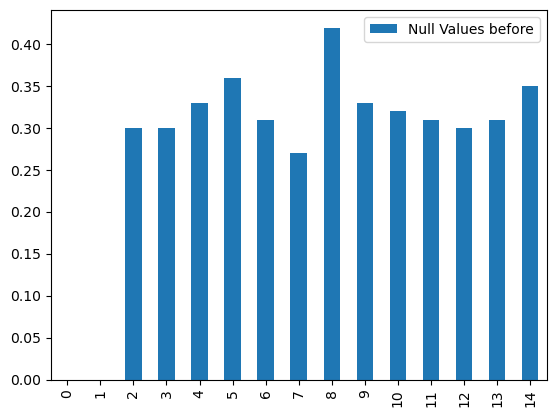

In [140]:
cen.plot(kind='bar')

<Axes: >

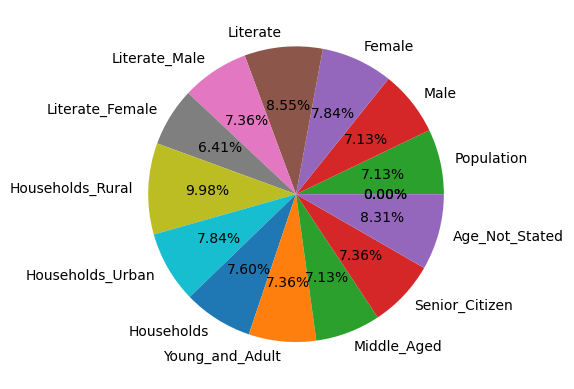

In [141]:
census11.isnull().sum().plot(kind='pie',autopct='%.2f%%')

In [142]:
census11['Population']=census11.apply(lambda x: x['Male']+x['Female'] if x['Population']<(x['Male']+x['Female']) else x['Population'],axis=1)

In [143]:
census11['Population'].fillna(census11['Male']+census11['Female'],inplace=True)

In [144]:
census11['Male'].fillna(census11['Population']-census11['Female'],inplace=True)

In [145]:
census11['Female'].fillna(census11['Population']-census11['Male'],inplace=True)
census11['Population'].fillna(census11['Young_and_Adult']+census11['Senior_Citizen']+census11['Age_Not_Stated'],inplace=True)

In [146]:
census11['Literate'].fillna(census11['Literate_Female']+census11['Literate_Male'],inplace=True)
census11['Literate_Male'].fillna(census11['Literate']-census11['Literate_Female'],inplace=True)
census11['Literate_Female'].fillna(census11['Literate']-census11['Literate_Male'],inplace=True)


In [147]:
census11['Households'].fillna(census11['Households_Rural']+census11['Households_Urban'],inplace=True)
census11['Households_Urban'].fillna(census11['Households']-census11['Households_Rural'],inplace=True)
census11['Households_Rural'].fillna(census11['Households']-census11['Households_Urban'],inplace=True)

In [148]:
census11['Young_and_Adult'].fillna(census11['Population']-census11['Middle_Aged']-census11['Senior_Citizen']-census11['Age_Not_Stated'],inplace=True)
census11['Middle_Aged'].fillna(census11['Population']-census11['Young_and_Adult']-census11['Senior_Citizen']-census11['Age_Not_Stated'],inplace=True)
census11['Senior_Citizen'].fillna(census11['Population']-census11['Young_and_Adult']-census11['Middle_Aged']-census11['Age_Not_Stated'],inplace=True)
census11['Age_Not_Stated'].fillna(census11['Population']-census11['Young_and_Adult']-census11['Middle_Aged']-census11['Senior_Citizen'],inplace=True)

In [149]:
census11['Male'].fillna(census11['Population']-census11['Female'],inplace=True)

In [150]:
#Null values in census after treatment according to given hints
cen_after=census11.isnull().sum()
cen_after=cen_after/100
cen_after=pd.DataFrame(cen_after,columns=['Null Values after']).reset_index()
cen_after

,index,Null Values after
0,State/UT,0.00
1,District,0.00
2,Population,0.00
3,Male,0.00
4,Female,0.00
5,Literate,0.02
6,Literate_Male,0.02
7,Literate_Female,0.02
8,Households_Rural,0.06
9,Households_Urban,0.03


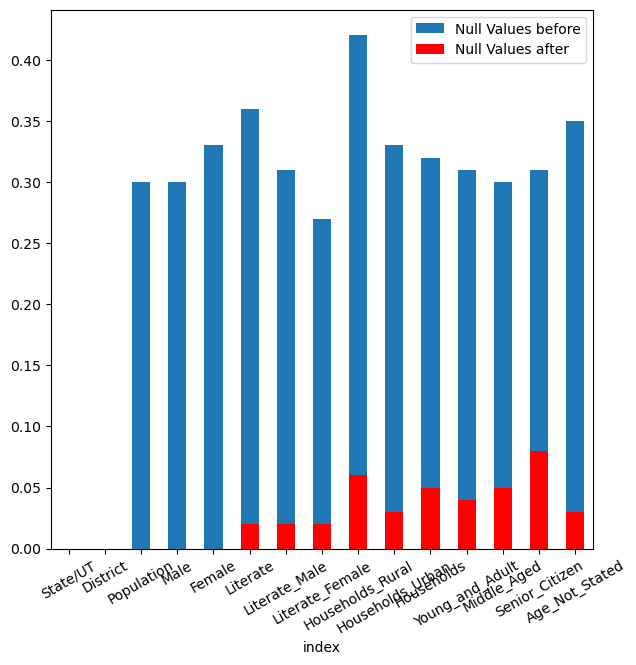

In [151]:
fig, ax = plt.subplots(figsize=(7,7))
cen.plot.bar(x='index',y='Null Values before',ax=ax)
cen_after.plot.bar(x='index',y='Null Values after',ax=ax,color='red')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.savefig('Diffrence in Null Values in census.png')
plt.show()

<Axes: >

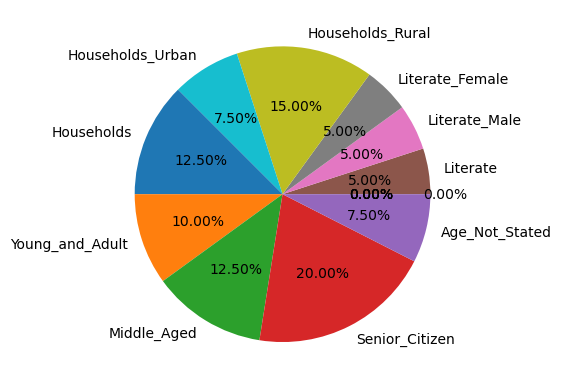

In [152]:
highlights=[0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0]
census11.isnull().sum().plot(kind='pie',explode=highlights,autopct='%.2f%%')

In [153]:
census11[census11.isna().any(axis=1)]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
11,Jammu and Kashmir,Pulwama,560440.0,293064.0,267376.0,293958.0,178326.0,115632.0,147520.0,21703.0,169223.0,342601.0,NaN,NaN,696.0
31,Himachal Pradesh,Sirmaur,529855.0,276289.0,253566.0,362645.0,205617.0,157028.0,171102.0,21054.0,192156.0,NaN,NaN,82471.0,301.0
70,Haryana,Yamunanagar,1214205.0,646718.0,567487.0,832457.0,474793.0,357664.0,214464.0,143259.0,357723.0,NaN,317708.0,NaN,298.0
104,Rajasthan,Bharatpur,2548462.0,1355726.0,1192736.0,1480869.0,943910.0,536959.0,NaN,129697.0,NaN,1659515.0,546362.0,329127.0,13458.0
206,Bihar,Madhubani,4487379.0,2329313.0,2158066.0,2155338.0,1340085.0,815253.0,1047552.0,41234.0,1088786.0,2860455.0,NaN,611899.0,NaN
245,Arunachal Pradesh,West Kameng,83947.0,46155.0,37792.0,48492.0,29566.0,18926.0,17889.0,NaN,NaN,53026.0,22362.0,8493.0,66.0
329,West Bengal,Uttar Dinajpur,3007134.0,1551066.0,1456068.0,NaN,853495.0,NaN,683981.0,94269.0,778250.0,1916033.0,704859.0,385155.0,1087.0
349,Jharkhand,Deoghar,1492073.0,775022.0,717051.0,793538.0,NaN,NaN,257373.0,64337.0,321710.0,944961.0,338413.0,205514.0,3185.0
362,Jharkhand,Jamtara,791042.0,404830.0,386212.0,426312.0,258260.0,168052.0,165555.0,20113.0,185668.0,480895.0,189889.0,NaN,NaN
364,Jharkhand,Khunti,531885.0,266335.0,265550.0,284575.0,164741.0,119834.0,NaN,NaN,135719.0,327152.0,125649.0,78736.0,348.0


In [154]:
# imputing the remaining missing values with mean
census11['Literate_Male'].fillna(census11['Literate_Male'].mean(),inplace=True)
census11['Literate'].fillna(census11['Literate'].mean(),inplace=True)
census11['Literate_Female'].fillna(census11['Literate_Female'].mean(),inplace=True)
census11['Households_Rural'].fillna(census11['Households_Rural'].mean(),inplace=True)
census11['Households_Urban'].fillna(census11['Households_Urban'].mean(),inplace=True)
census11['Households'].fillna(census11['Households'].mean(),inplace=True)
census11['Young_and_Adult'].fillna(census11['Young_and_Adult'].mean(),inplace=True)
census11['Middle_Aged'].fillna(census11['Middle_Aged'].mean(),inplace=True)
census11['Senior_Citizen'].fillna(census11['Senior_Citizen'].mean(),inplace=True)
census11['Age_Not_Stated'].fillna(census11['Age_Not_Stated'].mean(),inplace=True)

- problem 6 saving Data

In [155]:
census11.to_csv('Clean_Data/census.csv', index=False)

In [156]:
c=pd.read_csv('Clean_Data/census.csv')

In [157]:
c.isnull().sum()

State/UT            0
District            0
Population          0
Male                0
Female              0
Literate            0
Literate_Male       0
Literate_Female     0
Households_Rural    0
Households_Urban    0
Households          0
Young_and_Adult     0
Middle_Aged         0
Senior_Citizen      0
Age_Not_Stated      0
dtype: int64

In [158]:
c.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


- Problem Statement 7: (Process the relevant data)

In [222]:
h=pd.read_csv('Data/housing.csv',usecols=['State Name','District Name','Rural/Urban','Total Number of households','Total Number of Livable','Total Number of Dilapidated','Latrine_premise'])
h=h[(h['Rural/Urban']!='Total')]
h=replace(h,'District Name')
h=replace(h,'State Name')
h.head(5)

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,Rural,100,58.1,8.3,48.9
2,Jammu and Kashmir,Kupwara,Urban,100,49.5,4.8,70.2
3,Jammu and Kashmir,Badgam,Rural,100,46.3,3.9,83.3
5,Jammu and Kashmir,Badgam,Urban,100,33.8,2.6,90.4
6,Jammu and Kashmir,Leh(Ladakh),Rural,100,51.5,2.1,88.1


In [223]:
h.isnull().sum()

State Name                     0
District Name                  0
Rural/Urban                    0
Total Number of households     0
Total Number of Livable        0
Total Number of Dilapidated    0
Latrine_premise                0
dtype: int64

In [160]:
#Seperating the rural data
h1=h[(h["Rural/Urban"]=='Rural')]
h1=h1.drop("Rural/Urban", axis=1)
h1=h1.rename(columns={"District Name":"District", "Total Number of Livable":"Housholds_Rural_Liavable","Total Number of Dilapidated": "Households_Rural_Dilapidated", "Latrine_premise":"Households_Rural_Toilet_Premise"})

#Seperating the urban data
h2=h[(h["Rural/Urban"]=='Urban')]
h2=h2.drop("Rural/Urban", axis=1)
h2=h2.rename(columns={"District Name":"District", "Total Number of Livable":"Housholds_Urban_Liavable","Total Number of Dilapidated": "Households_Urban_Dilapidated", "Latrine_premise":"Households_Urban_Toilet_Premise"})

In [161]:
#filling the absolute values of rural
h1=h1.merge(c[['District','Households_Rural']],on=['District'])
h1['Total Number of households']=h1['Households_Rural']
h1['Housholds_Rural_Liavable']=h1['Housholds_Rural_Liavable']*h1['Households_Rural']*0.01
h1['Households_Rural_Dilapidated']=h1['Households_Rural_Dilapidated']*h1['Households_Rural']*0.01
h1['Households_Rural_Toilet_Premise']=h1['Households_Rural_Toilet_Premise']*h1['Households_Rural']*0.01
del h1['Households_Rural']
h1=h1.rename(columns={'Total Number of households':'Households_Rural'})

In [162]:
#filling the absolute values of Urban
h2=h2.merge(c[['District','Households_Urban']],on='District')
h2['Total Number of households']=h2['Households_Urban']
h2['Housholds_Urban_Liavable']=h2['Housholds_Urban_Liavable']*h2['Households_Urban']*0.01
h2['Households_Urban_Dilapidated']=h2['Households_Urban_Dilapidated']*h2['Households_Urban']*0.01
h2['Households_Urban_Toilet_Premise']=h2['Households_Urban_Toilet_Premise']*h2['Households_Urban']*0.01
del h2['Households_Urban']
h2=h2.rename(columns={'Total Number of households':'Households_Urban'})

In [163]:
h11=h1.iloc[:,1:]
h12=h2.iloc[:,1:]

In [164]:
# merging the rural and urban data
merged=pd.merge(h11,h12,on='District')
merged.head()

,District,Households_Rural,Housholds_Rural_Liavable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Housholds_Urban_Liavable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Kupwara,158438.0,92052.478,13150.354,77476.182,23226.0,11496.870,1114.848,16304.652
1,Badgam,160649.0,74380.487,6265.311,133820.617,27190.0,9190.220,706.940,24579.760
2,Leh(Ladakh),36920.0,19013.800,775.320,32526.520,17474.0,9540.804,192.214,16740.092
3,Kargil,40370.0,29591.210,1412.950,39078.160,7774.0,5348.512,93.288,7579.650
4,Punch,132139.0,78622.705,3171.336,18103.043,15269.0,4168.437,122.152,11497.557


In [165]:
merged.isnull().sum()

District                           0
Households_Rural                   0
Housholds_Rural_Liavable           0
Households_Rural_Dilapidated       0
Households_Rural_Toilet_Premise    0
Households_Urban                   0
Housholds_Urban_Liavable           0
Households_Urban_Dilapidated       0
Households_Urban_Toilet_Premise    0
dtype: int64

In [166]:
merged.to_csv('Clean_Data/housing.csv',index=False)

In [167]:
merged.isnull().sum()

District                           0
Households_Rural                   0
Housholds_Rural_Liavable           0
Households_Rural_Dilapidated       0
Households_Rural_Toilet_Premise    0
Households_Urban                   0
Housholds_Urban_Liavable           0
Households_Urban_Dilapidated       0
Households_Urban_Toilet_Premise    0
dtype: int64

- Problem statement 8

Visualize the following data for each state using appropriate methods:
	Number of households for 100 people
	Percentage of households that have toilet(s) in premise to the total number of households.
	Urban to rural population ratio.


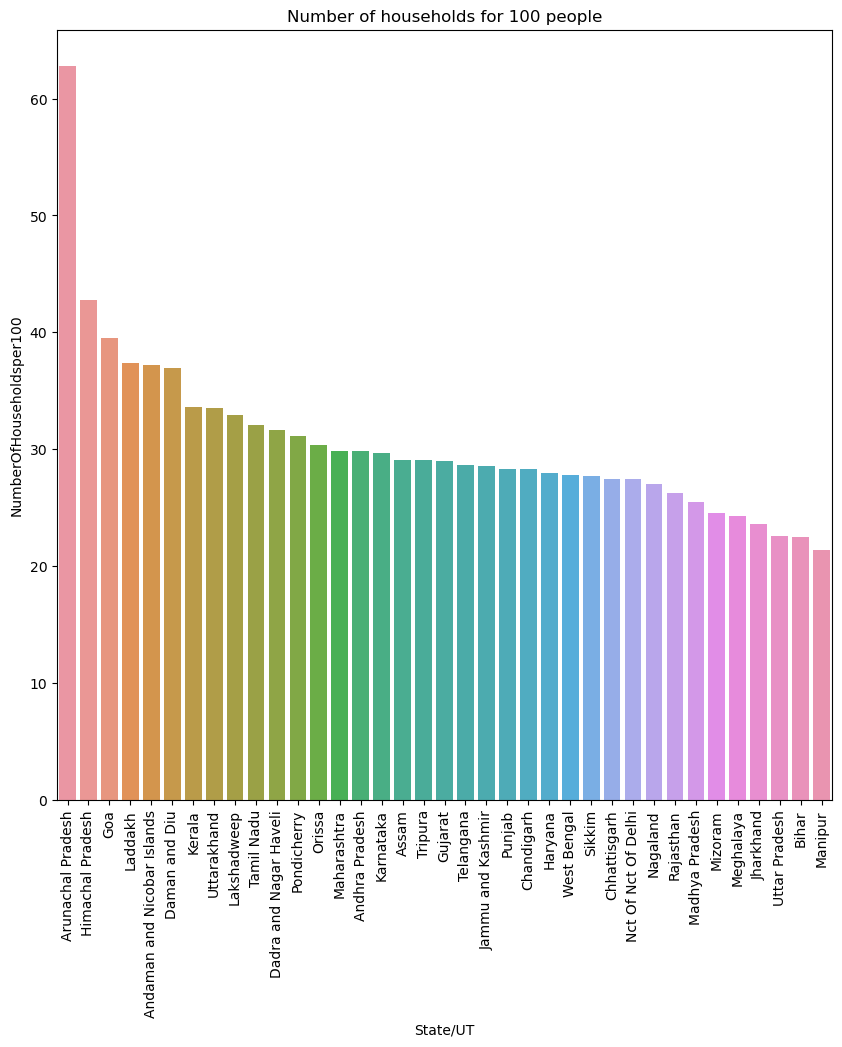

In [168]:
q8=c.loc[:,['State/UT','Population','Households']]
q8=q8.groupby('State/UT')[['Population','Households']].sum()
q8['NumberOfHouseholdsper100']=100*q8['Households']/q8['Population']
q8=q8.reset_index()
q8=q8.sort_values(by='NumberOfHouseholdsper100',ascending=False)
fig,ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='State/UT', y='NumberOfHouseholdsper100', data=q8, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Number of households for 100 people')
plt.savefig('Households per 100 people.png')
plt.show()

- States with Highest number of households for 100 people is Arunachal Pradesh and lowsest is Manipur

In [169]:
y=pd.read_csv('Data/housing.csv',usecols=['State Name','District Name','Rural/Urban','Total Number of households','Latrine_premise'])
y['State Name']=y['State Name'].apply(lambda x:x.title())
y=replace(y,'State Name')
y=y[y['Rural/Urban']=='Total']

In [170]:
y=y.merge(c[['District','Households']],left_on='District Name',right_on='District')

In [171]:
y['Latrine_premise']=y['Latrine_premise']*y['Households']*0.01
y['Total Number of households']=y['Households']

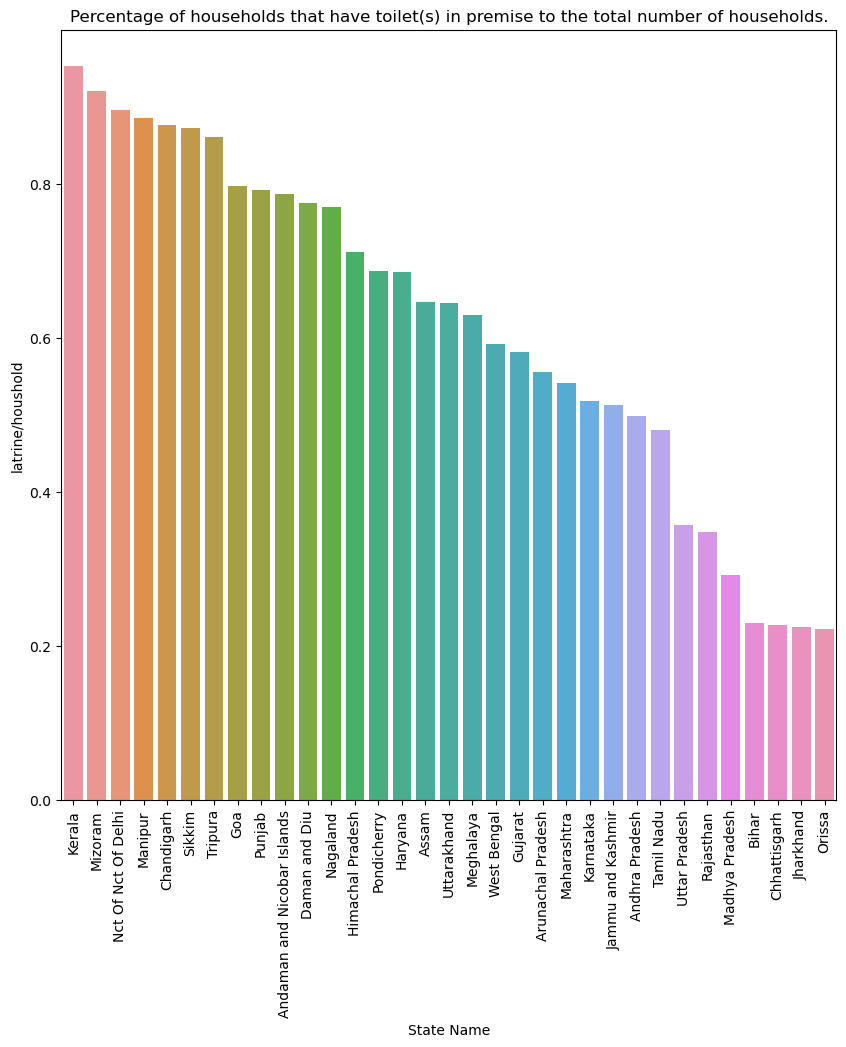

In [172]:
y=y.groupby('State Name')[['Total Number of households','Latrine_premise']].sum()
y=y.reset_index()
y['latrine/houshold']=y['Latrine_premise']/y['Total Number of households']
y=y.sort_values(by='latrine/houshold',ascending=False)
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='State Name', y='latrine/houshold', data=y, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Percentage of households that have toilet(s) in premise to the total number of households.')
plt.savefig('Toilets per households.png')
plt.show()

- Percentage of households that have toilet(s) in premise to the total number of households is highest for Kerala and lowest is for Orissa

In [173]:
h13=h1.groupby('State Name')['Households_Rural'].mean()
h13=h13.reset_index()
h23=h2.groupby('State Name')['Households_Urban'].mean()
h23=h23.reset_index()
q83=pd.merge(h13,h23,on='State Name')
q83['urban/rural']=q83['Households_Urban']/q83['Households_Rural']
q83=q83.sort_values(by='urban/rural',ascending=False)

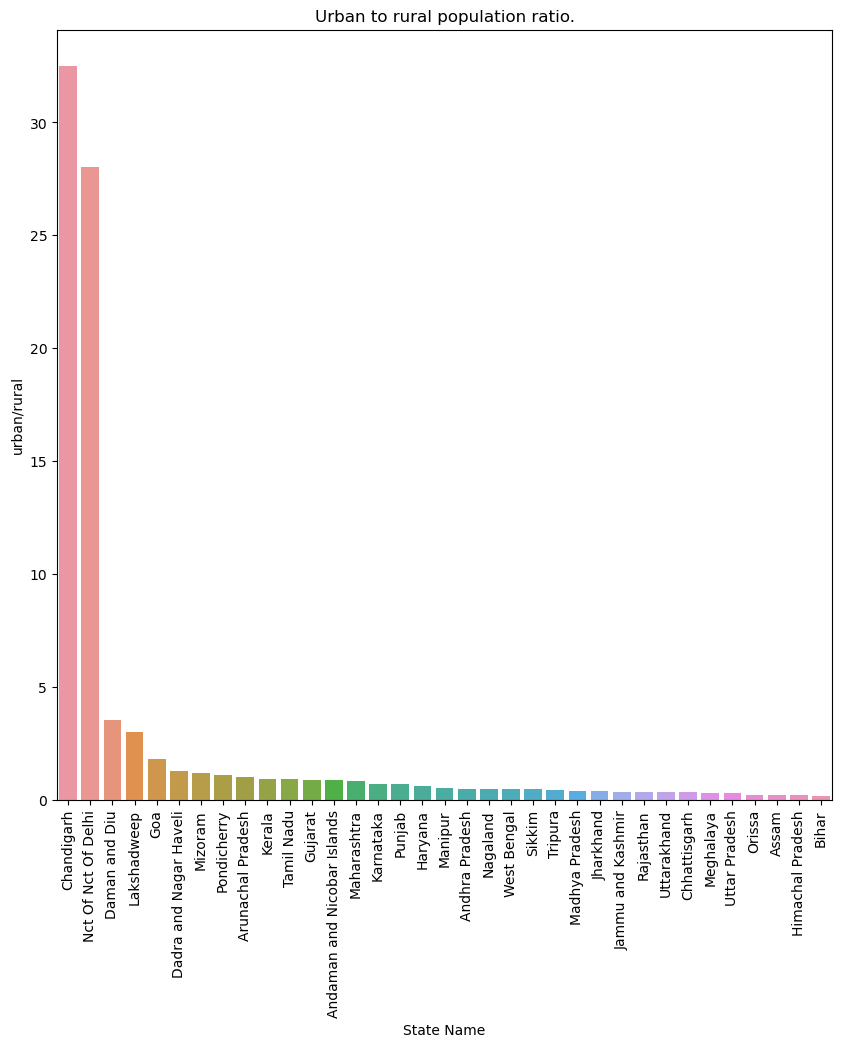

In [174]:
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='State Name', y='urban/rural', data=q83, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Urban to rural population ratio.')
plt.savefig('Urban to rural population ratio.png')
plt.show()

- Considering the population related to Households in the Data As there is no Direct way to seggregate the population in rural and urban
Chandigarh has the Urban to rural population and Bihar has highest rural population

- Problem Statement 9: (Inconsistency in different datasets)

#### As we have derived the rural and urban housholds in values from the census data to housing data there is no difference in data so its less than 10%

- Problem Statement 10:(Fix the header)

In [175]:
hospital=pd.read_csv('Data/hospitals.csv')
hospital.head()

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [176]:
hospital.columns

Index(['Unnamed: 0', 'PHC', 'CHC', 'SDH', 'DH', 'Hospitals', 'HospitalBeds'], dtype='object')

In [177]:
column={hospital.columns[0]:'State/UT'}

In [178]:
meta=pd.read_csv('Data/metadata.csv')
meta

,Acronyms
0,"Number of Primary Health Centers(PHCs),"
1,"Community Health Centers(CHCs),"
2,Sub-District/Divisional Hospitals(SDHs)
3,District Hospitals(DHs)


In [179]:
# Creating columns dictionary from data in Meta data csv 
d=dict(zip(hospital.columns[1:],meta['Acronyms']))
for k,v in d.items():
    d[k]=v.strip().replace(',','')
d

{'PHC': 'Number of Primary Health Centers(PHCs)',
 'CHC': 'Community Health Centers(CHCs)',
 'SDH': 'Sub-District/Divisional Hospitals(SDHs)',
 'DH': 'District Hospitals(DHs)'}

In [180]:
hospital=hospital.rename(columns=d)
hospital=hospital.rename(columns=column)
hospital

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra & Nagar Haveli,9,2,1,1,13,568
8,Daman & Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


In [181]:
hospital=replace(hospital,'State/UT')

In [182]:
hospital.loc[36.:]=hospital.loc[36.:].iloc[:,1:].apply(lambda x:x.str.replace(',', '').astype(float))

In [183]:
# conversion of columns in to numeric data
columns_to_convert = list(hospital.columns)[1:]
hospital[columns_to_convert] = hospital[columns_to_convert].apply(pd.to_numeric).astype(float)
print(columns_to_convert)
print(hospital.dtypes)

['Number of Primary Health Centers(PHCs)', 'Community Health Centers(CHCs)', 'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs)', 'Hospitals', 'HospitalBeds']
State/UT                                    object
Number of Primary Health Centers(PHCs)     float64
Community Health Centers(CHCs)             float64
Sub-District/Divisional Hospitals(SDHs)    float64
District Hospitals(DHs)                    float64
Hospitals                                  float64
HospitalBeds                               float64
dtype: object


In [184]:
hospital.fillna('All India',inplace=True)

In [185]:
hospital['Sub-District/Divisional Hospitals(SDHs)']=hospital['Hospitals']-hospital['Number of Primary Health Centers(PHCs)']-hospital['Community Health Centers(CHCs)']-hospital['District Hospitals(DHs)']

In [186]:
ratio=(hospital['Hospitals'])/hospital['HospitalBeds']
hospital.loc[ratio.idxmin(),'State/UT']

'Pondicherry'

In [187]:
hospital.isnull().sum()

State/UT                                   0
Number of Primary Health Centers(PHCs)     0
Community Health Centers(CHCs)             0
Sub-District/Divisional Hospitals(SDHs)    0
District Hospitals(DHs)                    0
Hospitals                                  0
HospitalBeds                               0
dtype: int64


- Problem Statement 11: (Create a function to alter the data to create uniformity)


In [188]:
hospital['State/UT']

0     Andaman and Nicobar Islands
1                  Andhra Pradesh
2               Arunachal Pradesh
3                           Assam
4                           Bihar
5                      Chandigarh
6                    Chhattisgarh
7          Dadra and Nagar Haveli
8                   Daman and Diu
9                    Nct Of Delhi
10                            Goa
11                        Gujarat
12                        Haryana
13               Himachal Pradesh
14              Jammu and Kashmir
15                      Jharkhand
16                      Karnataka
17                         Kerala
18                    Lakshadweep
19                 Madhya Pradesh
20                    Maharashtra
21                        Manipur
22                      Meghalaya
23                        Mizoram
24                       Nagaland
25                         Orissa
26                    Pondicherry
27                         Punjab
28                      Rajasthan
29            

In [189]:
hospital.to_csv('Clean_Data/all_hospitals.csv',index=False)

In [190]:
hos=pd.read_csv('Clean_Data/all_hospitals.csv')
hos.tail()

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
32,Tripura,114.0,22.0,12.0,9.0,157.0,4895.0
33,Uttar Pradesh,3277.0,671.0,0.0,174.0,4122.0,58310.0
34,Uttarakhand,275.0,69.0,19.0,20.0,383.0,6660.0
35,West Bengal,1374.0,406.0,70.0,55.0,1905.0,51163.0
36,All India,29899.0,5568.0,1255.0,1003.0,37725.0,739024.0


In [191]:
hos.dtypes

State/UT                                    object
Number of Primary Health Centers(PHCs)     float64
Community Health Centers(CHCs)             float64
Sub-District/Divisional Hospitals(SDHs)    float64
District Hospitals(DHs)                    float64
Hospitals                                  float64
HospitalBeds                               float64
dtype: object

- Problem Statement 12: (Analyze Healthcare facility disparity)

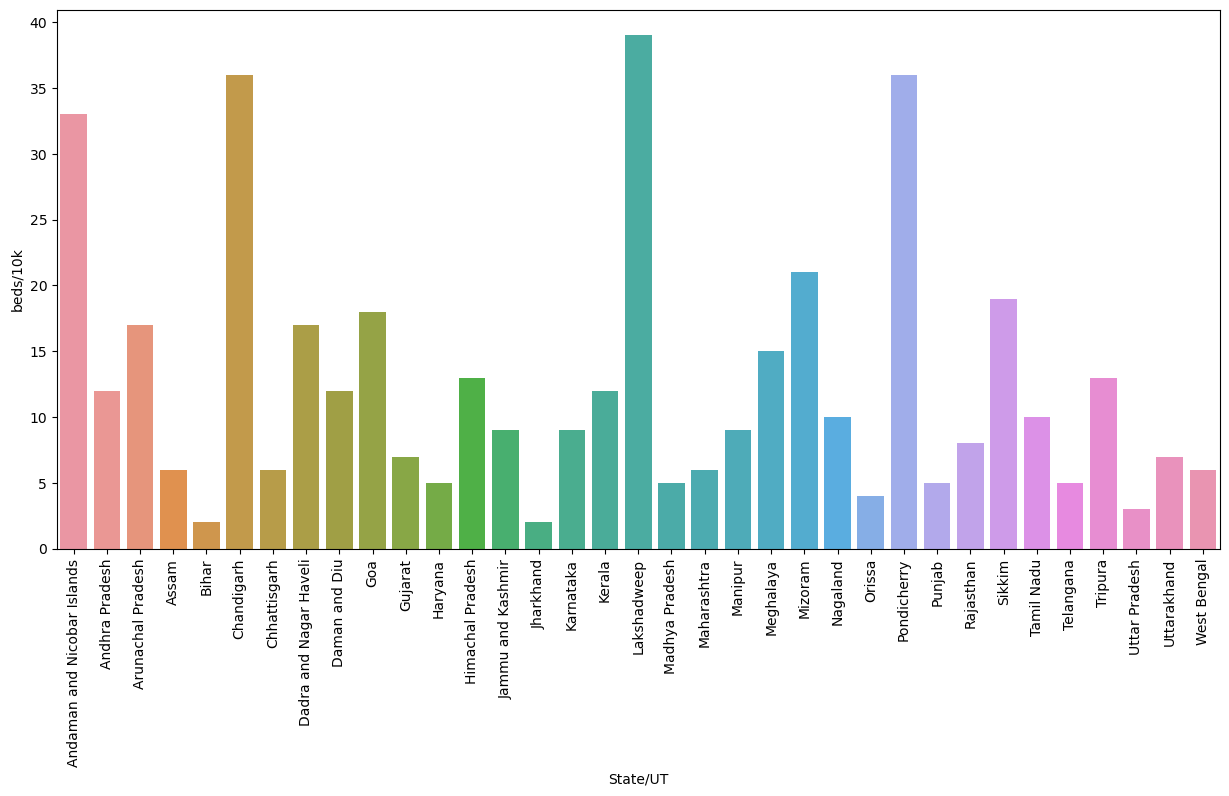

In [192]:
s=c.groupby('State/UT')['Population'].sum()
s=s.reset_index()
s1=pd.DataFrame(s)
s1=s1.merge(hos,on='State/UT')
s1['beds/10k']=(s1['HospitalBeds']*10000/s1['Population']).round()
fig,ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='State/UT', y='beds/10k', data=s1, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

- Bihar and Jharkhand have the least amount of beds for their population 

In [193]:
a=s1.loc[s1['beds/10k']==s1['beds/10k'].min(),'State/UT']
a

4         Bihar
14    Jharkhand
Name: State/UT, dtype: object

- Problem Statement 13: (Multi-line header)

In [194]:
gvthospital=pd.read_csv('Data/government_hospitals.csv')
gvthospital

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016
6,Goa*,17,1405,25,1608,31.12.2017
7,Gujarat,364,11715,122,20565,31.12.2016
8,Haryana*,609,6690,59,4550,31.12.2016
9,Himachal Pradesh*,705,5665,96,6734,31.12.2017


In [195]:
gvthospital.drop(0,inplace=True)

In [196]:
s=list(gvthospital.columns)
cl=['State/UT','Rural_Government_Hospitals','Rural_Government_Beds','Urban_Government_Hospitals','Urban_Government_Beds','Last_Updated']
d=dict(zip(s,cl))
gvthospital=gvthospital.rename(columns=d)
gvthospital=gvthospital.reset_index(drop=True)

- Problem Statement 14: (Data update and code reuse)

In [197]:
#gvthospital['Last_Updated']=gvthospital['Last_Updated'].apply(lambda x:x.replace('.','-'))
gvthospital['Last_Updated']=pd.to_datetime(gvthospital['Last_Updated'],format='%d.%m.%Y')
gvthospital.dtypes

State/UT                              object
Rural_Government_Hospitals            object
Rural_Government_Beds                 object
Urban_Government_Hospitals            object
Urban_Government_Beds                 object
Last_Updated                  datetime64[ns]
dtype: object

In [198]:
gvthospital.shape

(37, 6)

In [199]:
gvthospital[list(gvthospital.columns[1:-1])]=gvthospital[list(gvthospital.columns[1:-1])].apply(pd.to_numeric).astype(int)

In [200]:
gvthospital=replace(gvthospital,'State/UT')
gvthospital

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01
5,Goa,17,1405,25,1608,2017-12-31
6,Gujarat,364,11715,122,20565,2016-12-31
7,Haryana,609,6690,59,4550,2016-12-31
8,Himachal Pradesh,705,5665,96,6734,2017-12-31
9,Jammu and Kashmir,56,7234,76,4417,2016-12-30


In [201]:
gvthospital.fillna(gvthospital['Last_Updated'].mode()[0].date(),inplace=True)

In [202]:
gvthospital.iloc[36]

State/UT                       All India
Rural_Government_Hospitals         19810
Rural_Government_Beds             279588
Urban_Government_Hospitals          3772
Urban_Government_Beds             431173
Last_Updated                  2017-12-31
Name: 36, dtype: object

In [203]:
gvthospital.to_csv('Clean_Data/government_hospital.csv',index=False)

- Problem Statement 15: (Government healthcare facility disparity)

In [204]:
'''An idea was suggested* that first the three States/UTs which have 
the least amount of beds (in all hospitals government and private) for their population
is identified. Among those three the state which has the least number of government hospitals
can be recommended for setting up a new government hospital'''

'An idea was suggested* that first the three States/UTs which have \nthe least amount of beds (in all hospitals government and private) for their population\nis identified. Among those three the state which has the least number of government hospitals\ncan be recommended for setting up a new government hospital'

In [205]:
hos.head(2)

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27.0,4.0,0.0,3.0,34.0,1246.0
1,Andhra Pradesh,1417.0,198.0,31.0,20.0,1666.0,60799.0


In [206]:
jj=pd.DataFrame(c.groupby('State/UT')['Population'].sum().reset_index())
plotting=hos.merge(jj,on='State/UT')
plotting['beds_to_pop']=plotting['HospitalBeds']/plotting['Population']

In [207]:
plotting.head(5)

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,Population,beds_to_pop
0,Andaman and Nicobar Islands,27.0,4.0,0.0,3.0,34.0,1246.0,380581.0,0.003274
1,Andhra Pradesh,1417.0,198.0,31.0,20.0,1666.0,60799.0,49386799.0,0.001231
2,Arunachal Pradesh,122.0,62.0,0.0,15.0,199.0,2320.0,1383727.0,0.001677
3,Assam,1007.0,166.0,14.0,33.0,1220.0,19115.0,31205576.0,0.000613
4,Bihar,2007.0,63.0,33.0,43.0,2146.0,17796.0,104099452.0,0.000171


In [208]:
res=plotting.loc[list(plotting['beds_to_pop'].sort_values().head(3).index),['State/UT']]
res

,State/UT
4,Bihar
14,Jharkhand
32,Uttar Pradesh


In [209]:
plotting1=gvthospital.loc[:,['State/UT','Rural_Government_Hospitals','Urban_Government_Hospitals']]
plotting1['Total_gvt_hospitals']=gvthospital['Rural_Government_Hospitals']+gvthospital['Urban_Government_Hospitals']

In [210]:
q15=plotting1[plotting1['State/UT'].isin(res['State/UT'])]
q15

,State/UT,Rural_Government_Hospitals,Urban_Government_Hospitals,Total_gvt_hospitals
3,Bihar,930,103,1033
10,Jharkhand,519,36,555
26,Uttar Pradesh,4442,193,4635


- among these three state Jharkhand needs new hospital as it has least number of government hospitals among the three

According to WHO standards, a minimum of 3 beds per 1000 people is required. Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. If not, how many facilities are required to fill the gap?
Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).

- Problem Statement 16: (Gap in number of beds)

In [211]:
q16=plotting.loc[:,['State/UT','beds_to_pop','Population','HospitalBeds']]
q16['beds_to_pop']=q16['beds_to_pop']*1000
q16[q16['beds_to_pop']>3]

,State/UT,beds_to_pop,Population,HospitalBeds
0,Andaman and Nicobar Islands,3.273942,380581.0,1246.0
5,Chandigarh,3.558672,1055450.0,3756.0
17,Lakshadweep,3.877592,64473.0,250.0
25,Pondicherry,3.575455,1247953.0,4462.0


In [212]:
q16['HospitalBedsExpected']=q16['Population']*0.003
q16['DifferenceInBeds']=q16['HospitalBedsExpected']-q16['HospitalBeds']

In [213]:
q16

,State/UT,beds_to_pop,Population,HospitalBeds,HospitalBedsExpected,DifferenceInBeds
0,Andaman and Nicobar Islands,3.273942,380581.0,1246.0,1141.743,-104.257
1,Andhra Pradesh,1.231078,49386799.0,60799.0,148160.397,87361.397
2,Arunachal Pradesh,1.676631,1383727.0,2320.0,4151.181,1831.181
3,Assam,0.612551,31205576.0,19115.0,93616.728,74501.728
4,Bihar,0.170952,104099452.0,17796.0,312298.356,294502.356
5,Chandigarh,3.558672,1055450.0,3756.0,3166.350,-589.650
6,Chhattisgarh,0.561906,25545198.0,14354.0,76635.594,62281.594
7,Dadra and Nagar Haveli,1.652561,343709.0,568.0,1031.127,463.127
8,Daman and Diu,1.225092,243247.0,298.0,729.741,431.741
9,Goa,1.827849,1458545.0,2666.0,4375.635,1709.635


Text(0.5, 1.0, 'Required beds vs Actual beds in nation')

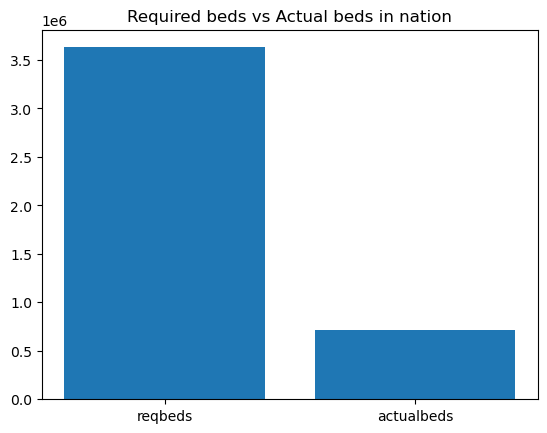

In [214]:
req=c['Population'].sum()
reqbeds=req*0.003
actualbeds=q16['HospitalBeds'].sum()
y=['reqbeds','actualbeds']
plt.bar(y,[reqbeds,actualbeds])
plt.title('Required beds vs Actual beds in nation')

- The required number of beds for overall India is far more high than actual number of beds existing in India

In [215]:
plotting.shape

(35, 9)

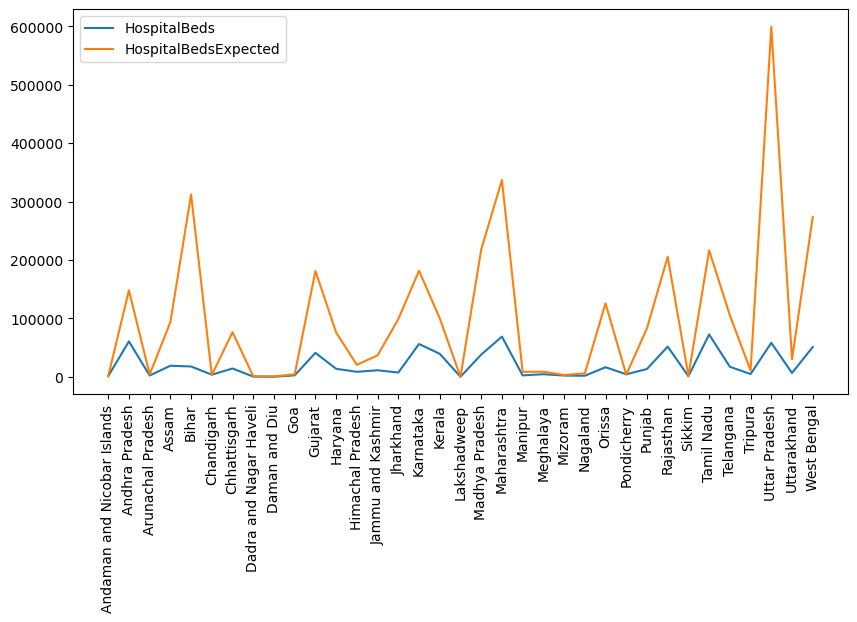

In [216]:
fig,ax=plt.subplots(figsize=(10,5))
#sns.barplot(x='State/UT',y=['HospitalBeds','HospitalBeds1'],data=q16,ax=ax)
q16[['HospitalBeds','HospitalBedsExpected']].plot(ax=ax)
ax.set_xticks(range(len(list(q16.index))))
ax.set_xticklabels(q16['State/UT'],rotation=90)
plt.show()

- There are very few states/ut in india that have number of beds according to WHO standards Those are Andaman and Nicobar Islands,Arunachal Pradesh,Chandigarh,Dadra and Nagar haveli,Dhaman and Diu,Goa,Lakshdweep,Mizoram,Sikkim ,
rest all fall behind

-  States like Bihar, Maharastra,Uttar Pradesh have very low number of beds when compared to expected number of beds these need the beds installation imediately

- Problem Statement 17: (Hospitals required to meet the standards)

In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?
Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards in the region, and round the number to the nearest integer to find the value.
Represent the findings visually.


In [217]:
plot=gvthospital.loc[:,['State/UT','Rural_Government_Beds','Urban_Government_Beds']]
plot['Total_Avg_gvt_beds']=(plot['Rural_Government_Beds']+plot['Urban_Government_Beds'])/2
plot

,State/UT,Rural_Government_Beds,Urban_Government_Beds,Total_Avg_gvt_beds
0,Andhra Pradesh,6480,16658,11569.0
1,Arunachal Pradesh,2136,268,1202.0
2,Assam,10944,6198,8571.0
3,Bihar,6083,5936,6009.5
4,Chhattisgarh,5070,4342,4706.0
5,Goa,1405,1608,1506.5
6,Gujarat,11715,20565,16140.0
7,Haryana,6690,4550,5620.0
8,Himachal Pradesh,5665,6734,6199.5
9,Jammu and Kashmir,7234,4417,5825.5


C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_17300\291166944.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


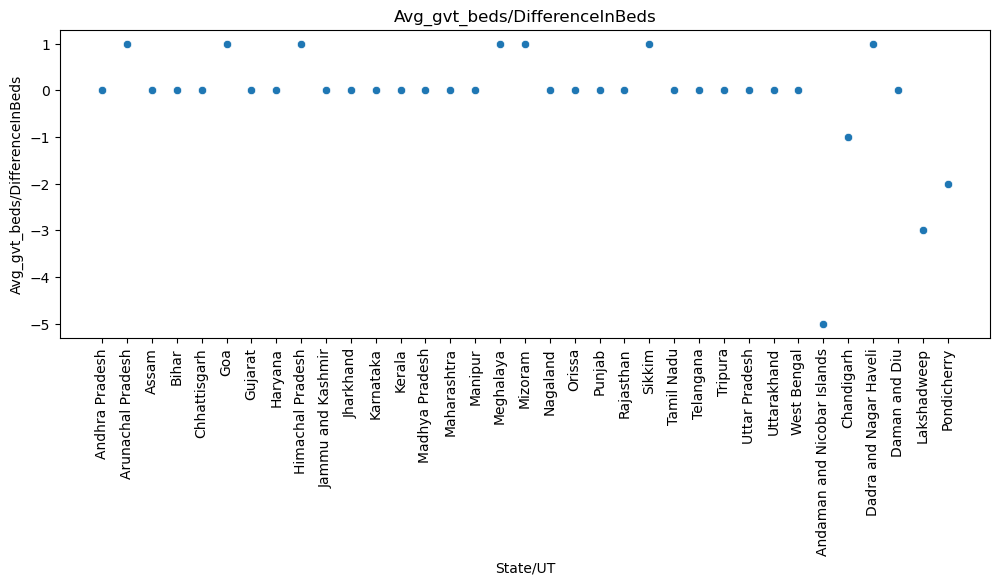

In [218]:
q17=plot.merge(q16.loc[:,['State/UT','DifferenceInBeds']],on='State/UT')
q17['Avg_gvt_beds/DifferenceInBeds']=(q17['Total_Avg_gvt_beds']/q17['DifferenceInBeds']).round()
fig,ax=plt.subplots(figsize=(12,4))
sns.scatterplot(x='State/UT',y='Avg_gvt_beds/DifferenceInBeds',data=q17,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Avg_gvt_beds/DifferenceInBeds')
plt.show()

- here negative ration indicates these states/ut have more than expected beds of WHO standards 

In [219]:
q17.shape

(35, 6)

In [220]:
l=dt.now()

In [221]:
time=l-f
print(time)

0:00:10.615317
